In [2]:
import torch

#퍼셉트론 모델 계산(AND gate) : [[0.0]]만
* 앞서 배운 텐서와 연산자를 이용하여 퍼셉트론 구현
* 고수준 모듈(nn.Module)을 사용하지 않고 구현

In [84]:
# 파라미터 값(input 특성 개수, 퍼셉트론의 개수, 학습률) 설정
input_dim = 2
units = 1
learning_rate = 1e-3

In [85]:
# weights(input 특성 : 2 / 퍼셉트론 : 1)
w= torch.rand(size=(input_dim, units), requires_grad=True)

# bias(퍼셉트론 : 1)
b =torch.zeros(size=(units,), requires_grad = True)

In [67]:
print(w)
print(w.shape)
print(b)
print(b.shape)

tensor([[0.6594],
        [0.9028]], requires_grad=True)
torch.Size([2, 1])
tensor([0.], requires_grad=True)
torch.Size([1])


##w*x + b 계산해보기

In [16]:
# 데이터 수를 명확하게 하기 위해 대괄호 2개를 씌어줘야 함.
input = torch.tensor([[0.,0.]])
label = torch.tensor([0.])

In [7]:
input.shape

torch.Size([1, 2])

In [9]:
# 괄호가 존재하지 않으면 scalar
torch.tensor(0.).shape

torch.Size([])

In [15]:
x = torch.matmul(input, w) + b
result = torch.maximum(input = torch.tensor(0.), other =x)

##loss 구하기(mse)

In [17]:
loss = torch.mean(torch.square(label - result))

In [21]:
loss

tensor(0., grad_fn=<MeanBackward0>)

##학습

In [19]:
# loss가 scalar 값이기에 backpropagation이 가능함
loss.backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

###backpropagation 결과 확인

In [22]:
w.grad

tensor([[0.],
        [0.]])

In [62]:
b.grad

#퍼셉트론 모델 학습(AND gate)
* 퍼셉트론 모델으로 예측값을 계산
* 모델의 예측값과 정답간의 에러를 loss을 이용해 계산
* 모델의 변수 (w,b) loss 값에 미치는 영향도를 미분(오차역전파)을 통해 계산
* SGD를 이용하여 모델의 변수를 업데이트
*

In [24]:
# input 재설정.
input = torch.tensor([[0.,1.]])
label = torch.tensor([0.])

In [25]:
# 학습
# 퍼셉트론 모델으로 예측값을 계산
x = torch.matmul(input, w) + b
result = torch.maximum(input = torch.tensor(0.), other =x)

# 모델의 예측값과 정답간의 에러를 loss를 이용해 계산


In [26]:
loss = torch.mean(torch.square(label - result))

In [27]:
loss

tensor(0.1111, grad_fn=<MeanBackward0>)

In [28]:
# 모델의 변수(w, b)들이 loss 값에 미치는 영향도를 미분(back-propagation)을 통해 계산
loss.backward()

In [29]:
w.grad

tensor([[0.0000],
        [0.6666]])

In [30]:
b.grad

tensor([0.6666])

In [34]:
# SGD를 이용해서 모델 변수 업데이트
# pytorch에서는 w = w - learning_rate*grad로 업데이트 하지 x
# 그대신에 w.data에 없데이트
w.data = w - learning_rate*w.grad
b.data = w - learning_rate*b.grad


In [ ]:
"""
원래 w의 값

tensor([[0.7422],
        [0.3333]], requires_grad=True)

"""

In [64]:
print(w)
print(b)

tensor([[0.2988],
        [0.0720]], requires_grad=True)
tensor([0.], requires_grad=True)


##gradient가 남아있는채로 다시 backpropagate를 하면 x
데이터 왜곡이 됨(이전값과 병합)

In [37]:
w.grad = None
b.grad = None

# train 과정 모듈(함수)화 : 학습 함수 제작

##predict 함수 제작 : f(wx+b)

In [39]:
def predict(input):
  x = torch.matmul(input,w)+b
  x = torch.maximum(input = torch.tensor(0.), other=x)
  return x

##loss 함수 제작 : mse

In [40]:
def mse_loss(labels, predictions):
  loss = torch.mean(torch.square(labels-predictions))
  return loss

##train : 예측값을 이용해 parameter 업데이트

In [77]:

def train(inputs, labels):
  # 퍼셉트론 모델으로 예측값을 계산
  predictions = predict(inputs)

  # 모델의 예측값과 정답간의 에러를 loss 을 이용해 계산
  loss = mse_loss(labels, predictions)

  # 모델의 변수(w, b)가 loss 값에 미치는 영향도를 backpropagation을 통해 계산
  loss.backward()

  # SGD를 이용하여 모델의 변수 업데이트
  w.data = w - learning_rate*w.grad
  b.data = b - learning_rate*b.grad

  # 모델의 변수(w, b)의 영향도(미분값 - gradient)를 초기화
  w.grad = None
  b.grad = None
  return loss

# 퍼셉트론 모델 학습(AND gate) : all data


In [86]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
# 데이터 준비
inputs = torch.tensor([[0,0],
                       [0,1],
                       [1,0],
                       [1,1]], dtype = torch.float32)
labels = torch.tensor([0,0,0,1], dtype=torch.float32)

In [88]:
inputs.shape

torch.Size([4, 2])

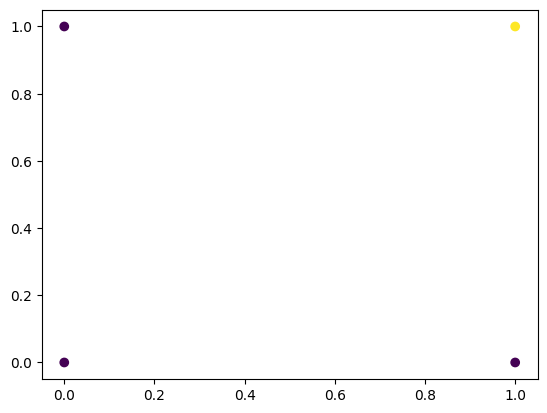

In [89]:
# c 색상 구분
plt.scatter(inputs[:,0], inputs[:,1], c=labels[:])

In [90]:
for epoch in range(100):
  for x,y in zip(inputs, labels):
    loss = train(x,y)
  print("Epoch {}: loss = {}".format(epoch+1, float(loss)))

Epoch 1: loss = 0.5986109375953674
Epoch 2: loss = 0.5806570053100586
Epoch 3: loss = 0.563181459903717
Epoch 4: loss = 0.5461729168891907
Epoch 5: loss = 0.5296194553375244
Epoch 6: loss = 0.51350998878479
Epoch 7: loss = 0.4978336989879608
Epoch 8: loss = 0.48257943987846375
Epoch 9: loss = 0.46773698925971985
Epoch 10: loss = 0.4532960057258606
Epoch 11: loss = 0.4392465651035309
Epoch 12: loss = 0.4255788028240204
Epoch 13: loss = 0.41228318214416504
Epoch 14: loss = 0.3993505835533142
Epoch 15: loss = 0.3867720067501068
Epoch 16: loss = 0.37453845143318176
Epoch 17: loss = 0.36264142394065857
Epoch 18: loss = 0.35107219219207764
Epoch 19: loss = 0.339822918176651
Epoch 20: loss = 0.32888534665107727
Epoch 21: loss = 0.31825175881385803
Epoch 22: loss = 0.3079143166542053
Epoch 23: loss = 0.2978658676147461
Epoch 24: loss = 0.2880987226963043
Epoch 25: loss = 0.2786061465740204
Epoch 26: loss = 0.26938098669052124
Epoch 27: loss = 0.260416716337204
Epoch 28: loss = 0.25170639157295

In [91]:
print(inputs.shape)
print(w.shape)
print(b.shape)
print(b)

torch.Size([4, 2])
torch.Size([2, 1])
torch.Size([1])
tensor([-0.3106], requires_grad=True)


In [92]:
prediction = predict(inputs)

In [93]:
print(prediction)

tensor([[0.0000],
        [0.3831],
        [0.3928],
        [1.0865]], grad_fn=<MaximumBackward0>)


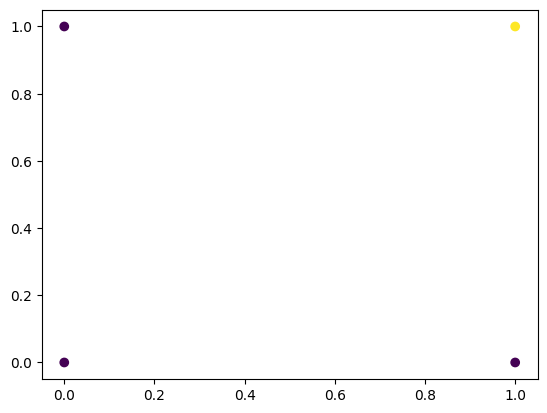

In [95]:
plt.scatter(inputs[:,0], inputs[:,1], c=prediction[:]>0.5)

##여러 데이터

In [99]:
test_inputs = np.random.uniform(low=0, high=1, size=(5000,2)).astype(np.float32)

In [100]:
test_inputs = torch.tensor(test_inputs)

In [101]:
test_predictions=predict(test_inputs)

In [103]:
test_predictions

tensor([[0.5257],
        [0.3850],
        [0.0492],
        ...,
        [0.1115],
        [0.1689],
        [0.1127]], grad_fn=<MaximumBackward0>)

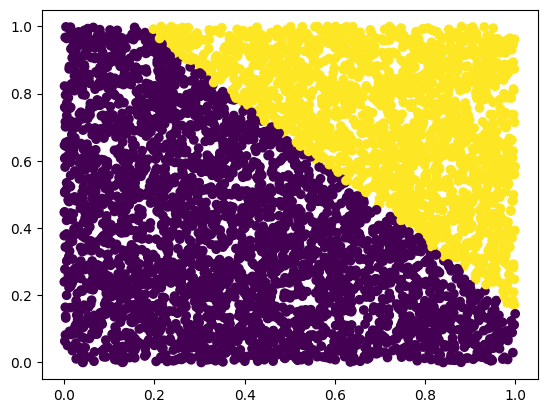

In [107]:
plt.scatter(test_inputs[:,0], test_inputs[:,1], c=test_predictions[:]>0.5)